In [1]:
import pandas as pd

# Ler o ficheiro
file_path_csv = './ames.csv'

# Construir o dataframe
ames_data = pd.read_csv(file_path_csv)

# Mostrar as primeiras linhas e a estrutura do conjunto de dados
ames_data.head()

MSSubClass                  MSZoning  LotFrontage  \
0  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density        141.0   
1  One_Story_1946_and_Newer_All_Styles  Residential_High_Density         80.0   
2  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density         81.0   
3  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density         93.0   
4             Two_Story_1946_and_Newer   Residential_Low_Density         74.0   

   LotArea Street            Alley            LotShape LandContour Utilities  \
0  31770.0   Pave  No_Alley_Access  Slightly_Irregular         Lvl    AllPub   
1  11622.0   Pave  No_Alley_Access             Regular         Lvl    AllPub   
2  14267.0   Pave  No_Alley_Access  Slightly_Irregular         Lvl    AllPub   
3  11160.0   Pave  No_Alley_Access             Regular         Lvl    AllPub   
4  13830.0   Pave  No_Alley_Access  Slightly_Irregular         Lvl    AllPub   

  LotConfig  ... PoolArea   PoolQC            Fence MiscFeature  MiscVal  \
0    Corner  ...      0.0  No_Pool         No_Fence         NaN      0.0   
1    Inside  ...      0.0  No_Pool  Minimum_Privacy         NaN      0.0   
2    Corner  ...      0.0  No_Pool         No_Fence        Gar2  12500.0   
3    Corner  ...      0.0  No_Pool         No_Fence         NaN      0.0   
4    Inside  ...      0.0  No_Pool  Minimum_Privacy         NaN      0.0   

  MoSold YearSold SaleType  SaleCondition  SalePrice  
0      5     2010      WD          Normal     215000  
1      6     2010      WD          Normal     105000  
2      6     2010      WD          Normal     172000  
3      4     2010      WD          Normal     244000  
4      3     2010      WD          Normal     189900  

[5 rows x 79 columns]

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tutorial: Aplicar K-Means Clustering

## Step 1: Preparação dos Dados
Selecionar apenas os atributos numéricos e lidar com os valores nulos.


In [3]:
numeric_features = ames_data.select_dtypes(include=[np.number]).dropna()

## Step 2: Normalização
Normalizar os dados para garantir que todos atributos contribuem de igual forma para o clustering.

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

## Step 3: Aplicar K-Means
Usar o K-Means da biblioteca sklearn para executar o clustering.

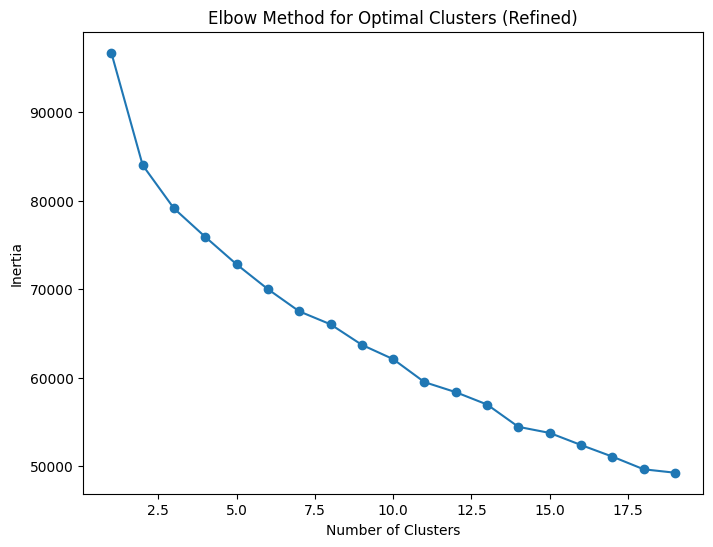

In [5]:
# Adjusting the process to reduce computation time
# Focusing on a smaller range of clusters for optimization
optimized_cluster_range = range(1, 20)

# Recalculating the elbow method with fewer clusters
inertia = []
for k in optimized_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the refined elbow method
plt.figure(figsize=(8, 6))
plt.plot(optimized_cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters (Refined)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
kmeans_refined = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters_refined = kmeans_refined.fit_predict(scaled_data)

# Add the cluster labels to the numeric data
numeric_features['Cluster'] = clusters_refined

## Step 4: Visaulização dos Resultados
Fazer o plot e interpretar os dados.

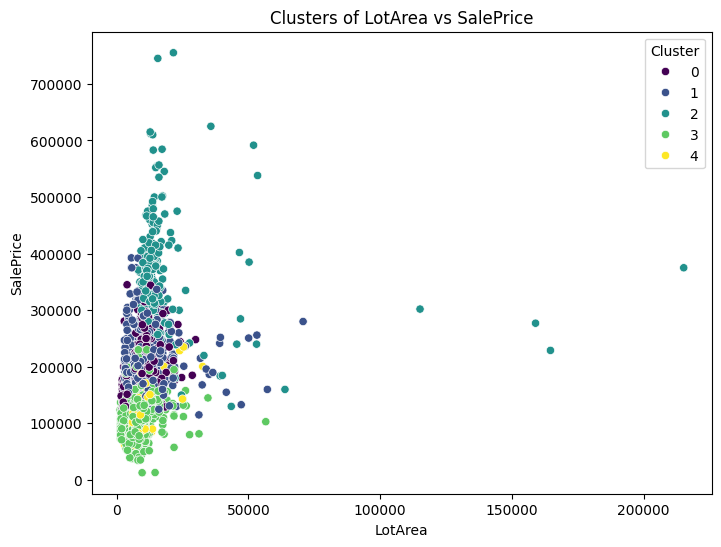

In [9]:
# Visualize LotArea vs SalePrice with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=numeric_features['LotArea'],
    y=numeric_features['SalePrice'],
    hue=numeric_features['Cluster'],
    palette='viridis'
)
plt.title('Clusters of LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()



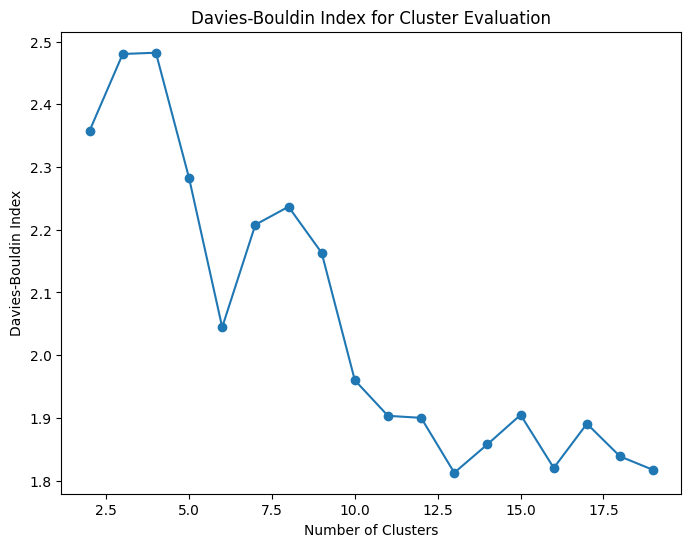

In [10]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin Index for the refined clusters
davies_bouldin_scores = []

# Loop over the range of clusters
for k in optimized_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    if k > 1:  # Davies-Bouldin is undefined for a single cluster
        score = davies_bouldin_score(scaled_data, labels)
        davies_bouldin_scores.append(score)
    else:
        davies_bouldin_scores.append(None)  # Placeholder for single cluster

# Plot Davies-Bouldin scores
plt.figure(figsize=(8, 6))
plt.plot(optimized_cluster_range[1:], davies_bouldin_scores[1:], marker='o')
plt.title('Davies-Bouldin Index for Cluster Evaluation')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

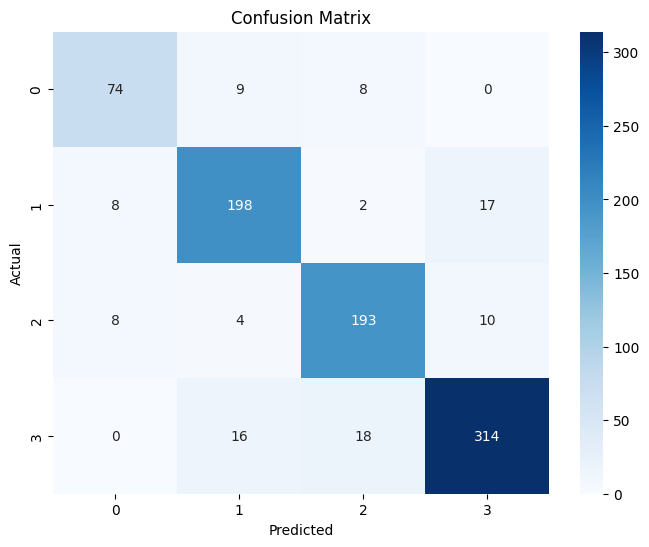

LogisticRegression Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82        91
           1       0.87      0.88      0.88       225
           2       0.87      0.90      0.89       215
           3       0.92      0.90      0.91       348

    accuracy                           0.89       879
   macro avg       0.87      0.87      0.87       879
weighted avg       0.89      0.89      0.89       879



In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Set the number of clusters to 4 and re-apply K-Means
kmeans_refined = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_refined = kmeans_refined.fit_predict(scaled_data)

# Add the cluster labels to the dataset
numeric_features['Cluster'] = clusters_refined

# Prepare data for decision tree classification
# Separate features (X) and the cluster labels (y)
X = numeric_features.drop(columns=['Cluster'])  # Features
y = numeric_features['Cluster']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict the cluster labels on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the classification performance
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)

# Create a pretty confusion matrix visualization
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Assuming the confusion matrix is available
# Relabeling clusters for clarity in visualization
unique_clusters = sorted(y.unique())
plot_confusion_matrix(confusion_matrix_output, labels=unique_clusters)

print(f"LogisticRegression Report:\n", classification_report_output)
